# ♻️ Waste Management Optimization
This notebook analyzes historical waste data to optimize waste management through clustering, forecasting, and facility performance evaluation.


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df = pd.read_csv(r"C:\DS Project\waste_data.csv")
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_WSTREAMS@DF_WSTREAMS(1.0),"Waste - Selected waste streams: generation, re...",I,AUT,Austria,A,Annual,GEN,Waste generated,...,2019,NaN,295.752000,NaN,A,Normal value,3,Thousands,2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_WSTREAMS@DF_WSTREAMS(1.0),"Waste - Selected waste streams: generation, re...",I,AUT,Austria,A,Annual,GEN,Waste generated,...,2020,NaN,299.140000,NaN,A,Normal value,3,Thousands,2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_WSTREAMS@DF_WSTREAMS(1.0),"Waste - Selected waste streams: generation, re...",I,BEL,Belgium,A,Annual,GEN,Waste generated,...,2019,NaN,351.186000,NaN,A,Normal value,3,Thousands,2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_WSTREAMS@DF_WSTREAMS(1.0),"Waste - Selected waste streams: generation, re...",I,BEL,Belgium,A,Annual,GEN,Waste generated,...,2020,NaN,369.250000,NaN,A,Normal value,3,Thousands,2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_WSTREAMS@DF_WSTREAMS(1.0),"Waste - Selected waste streams: generation, re...",I,CHL,Chile,A,Annual,GEN,Waste generated,...,2019,NaN,7.722207,NaN,A,Normal value,3,Thousands,2,Two


In [93]:
df_clean = df[[
    'Reference area', 'TIME_PERIOD', 'Materials', 'Measure', 'OBS_VALUE', 'Unit multiplier'
]].rename(columns={
    'Reference area': 'Country',
    'TIME_PERIOD': 'Year',
    'Materials': 'Material',
    'Measure': 'Measure',
    'OBS_VALUE': 'Value',
    'Unit multiplier': 'Unit'
})
df_clean.head()


,Country,Year,Material,Measure,Value,Unit
0,Austria,2019,Packaging - plastic,Waste generated,295.752000,Thousands
1,Austria,2020,Packaging - plastic,Waste generated,299.140000,Thousands
2,Belgium,2019,Packaging - plastic,Waste generated,351.186000,Thousands
3,Belgium,2020,Packaging - plastic,Waste generated,369.250000,Thousands
4,Chile,2019,Packaging - plastic,Waste generated,7.722207,Thousands


In [94]:
unit_multipliers = {
    'Units': 1,
    'Thousands': 1_000,
    'Millions': 1_000_000,
    'Billions': 1_000_000_000
}

df_clean['Multiplier'] = df_clean['Unit'].map(unit_multipliers)
df_clean['Value'] = df_clean['Value'] * df_clean['Multiplier']
df_clean = df_clean.drop(columns=['Unit', 'Multiplier'])

df_clean.head()


,Country,Year,Material,Measure,Value
0,Austria,2019,Packaging - plastic,Waste generated,295752.0000
1,Austria,2020,Packaging - plastic,Waste generated,299140.0000
2,Belgium,2019,Packaging - plastic,Waste generated,351186.0000
3,Belgium,2020,Packaging - plastic,Waste generated,369250.0000
4,Chile,2019,Packaging - plastic,Waste generated,7722.2068


In [95]:
df_pivot = df_clean.pivot_table(
    index=['Country', 'Year', 'Material'],
    columns='Measure',
    values='Value',
    aggfunc='sum'
).reset_index()

df_pivot.head()


Measure,Country,Year,Material,Waste generated
0,Albania,2022,All metals,11058.0
1,Albania,2022,Ferrous metals,3359.0
2,Albania,2022,Glass,1448.0
3,Albania,2022,Masonry materials,25668.0
4,Albania,2022,Other non-ferrous metals,110619.0


In [96]:
sns.set(style="whitegrid")

C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\1438868317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


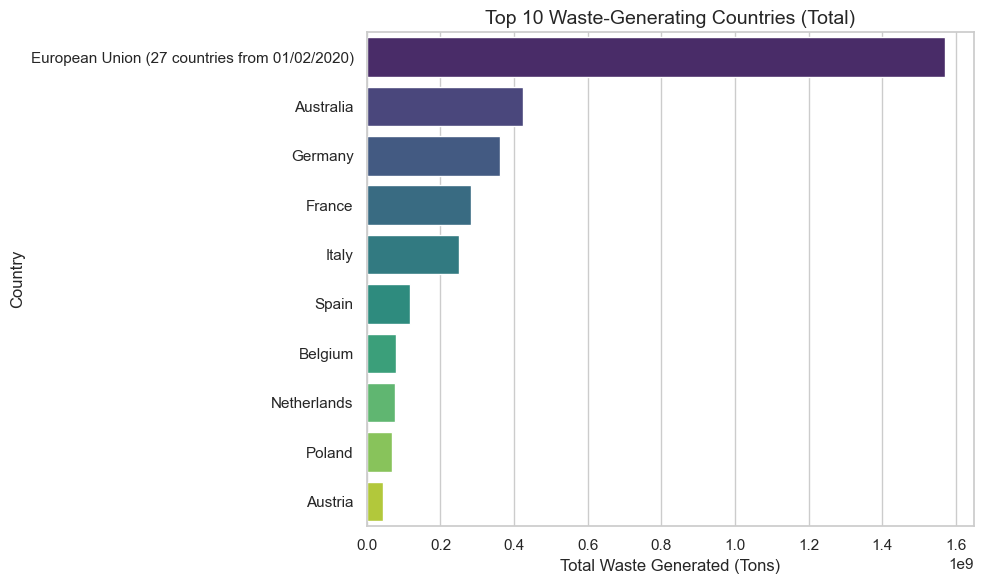

In [97]:
top_countries = df_pivot.groupby('Country')['Waste generated'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Waste-Generating Countries (Total)", fontsize=14)
plt.xlabel("Total Waste Generated (Tons)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


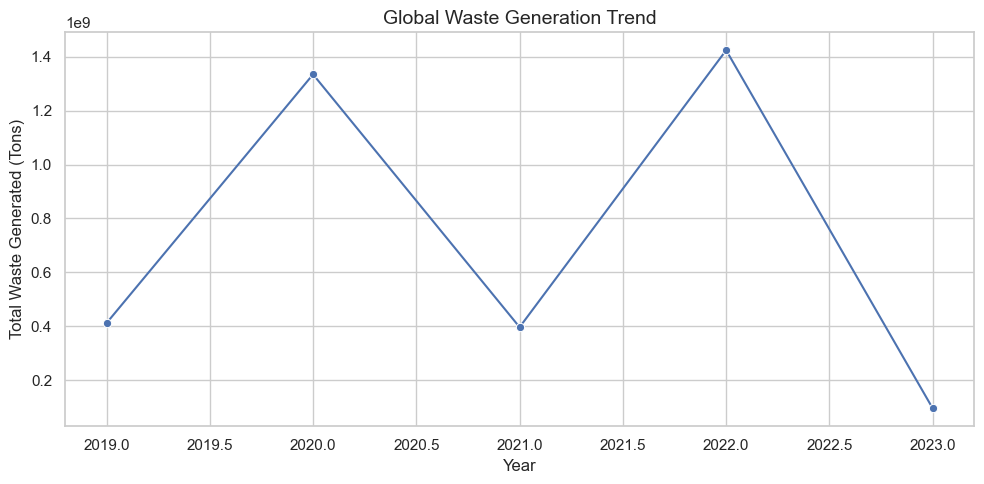

In [98]:
global_trend = df_pivot.groupby('Year')['Waste generated'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=global_trend.index, y=global_trend.values, marker='o')
plt.title("Global Waste Generation Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Waste Generated (Tons)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\3108556808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_materials.values, y=top_materials.index, palette="cubehelix")


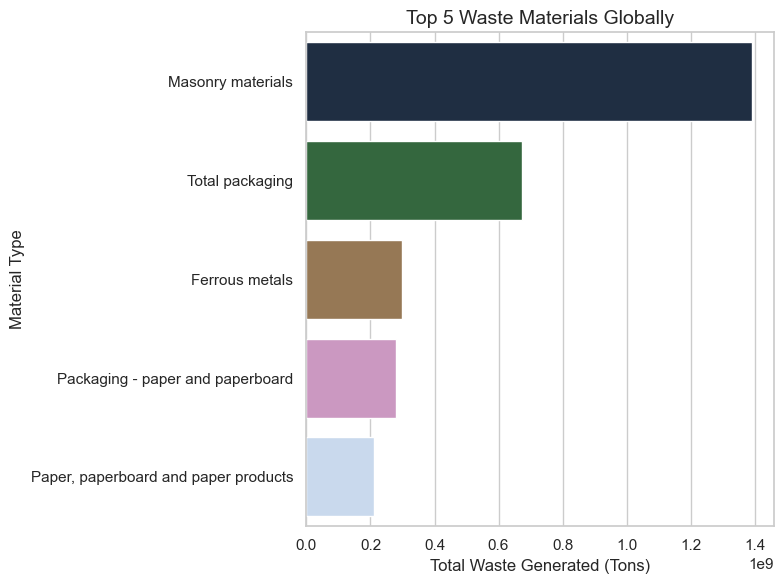

In [99]:
top_materials = df_pivot.groupby('Material')['Waste generated'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_materials.values, y=top_materials.index, palette="cubehelix")
plt.title("Top 5 Waste Materials Globally", fontsize=14)
plt.xlabel("Total Waste Generated (Tons)")
plt.ylabel("Material Type")
plt.tight_layout()
plt.show()


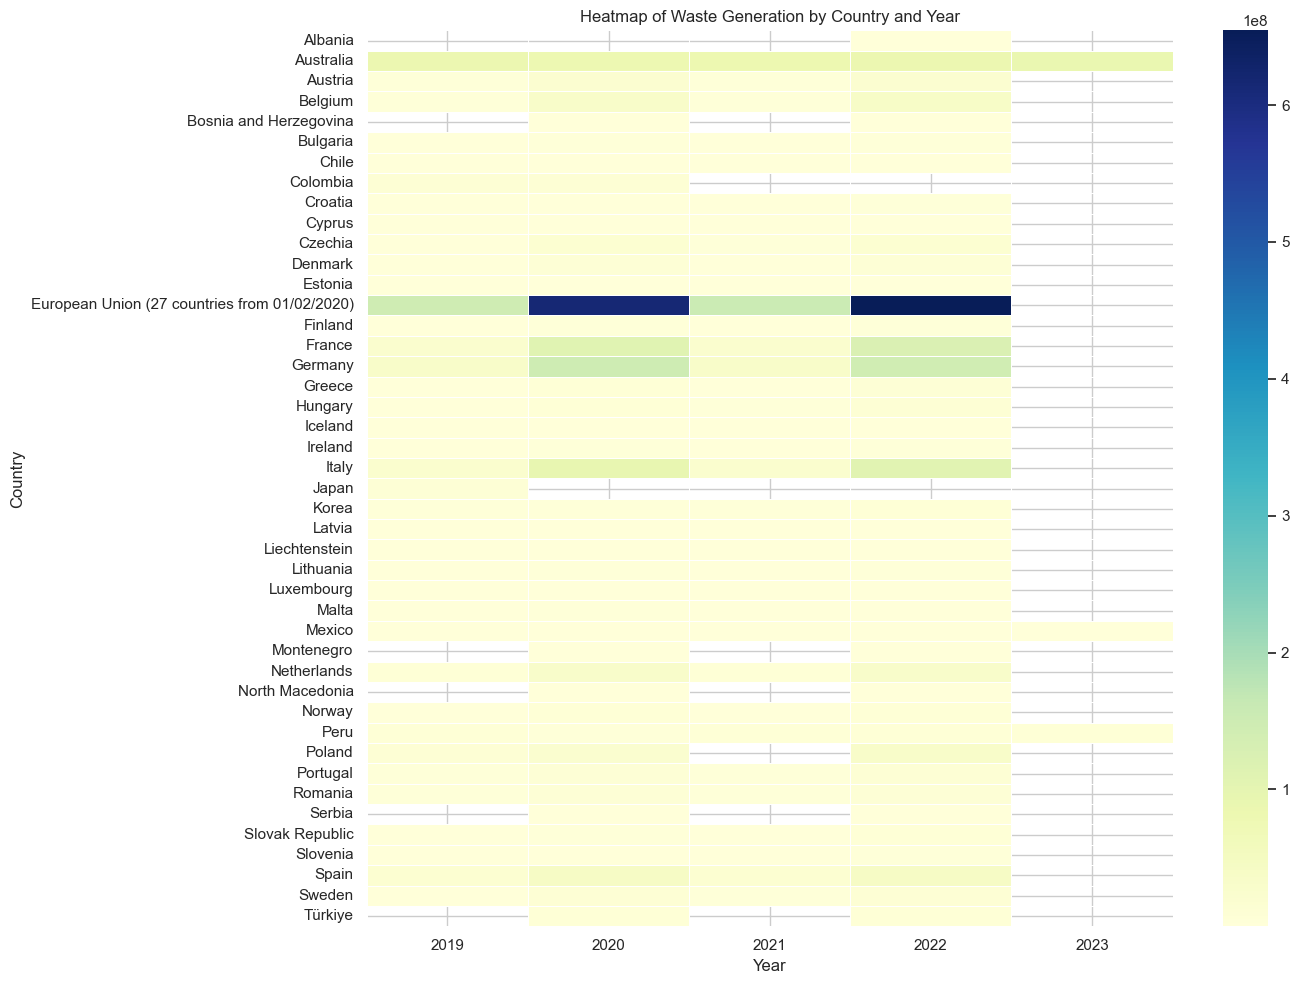

In [100]:
heatmap_data = df_pivot.pivot_table(index='Country', columns='Year', values='Waste generated', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Waste Generation by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [101]:
from prophet import Prophet

In [102]:
# Summarize total waste generated globally per year
waste_forecast_df = df_pivot.groupby('Year')['Waste generated'].sum().reset_index()

# Rename columns as required by Prophet
waste_forecast_df.columns = ['ds', 'y']

# Convert 'ds' column to datetime
waste_forecast_df['ds'] = pd.to_datetime(waste_forecast_df['ds'], format='%Y')

waste_forecast_df.head()


,ds,y
0,2019-01-01,4.118870e+08
1,2020-01-01,1.334452e+09
2,2021-01-01,3.968789e+08
3,2022-01-01,1.424032e+09
4,2023-01-01,9.577602e+07


In [103]:
model = Prophet()
model.fit(waste_forecast_df)


19:15:31 - cmdstanpy - INFO - Chain [1] start processing
19:15:31 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
# Forecast for next 10 years
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)


c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


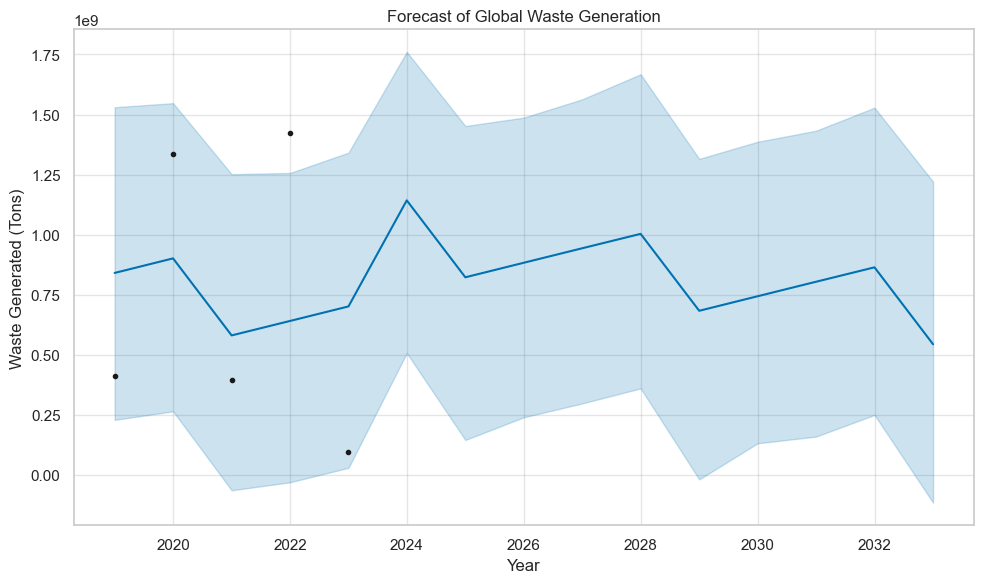

In [105]:
model.plot(forecast)
plt.title("Forecast of Global Waste Generation")
plt.xlabel("Year")
plt.ylabel("Waste Generated (Tons)")
plt.grid(True)
plt.tight_layout()
plt.show()


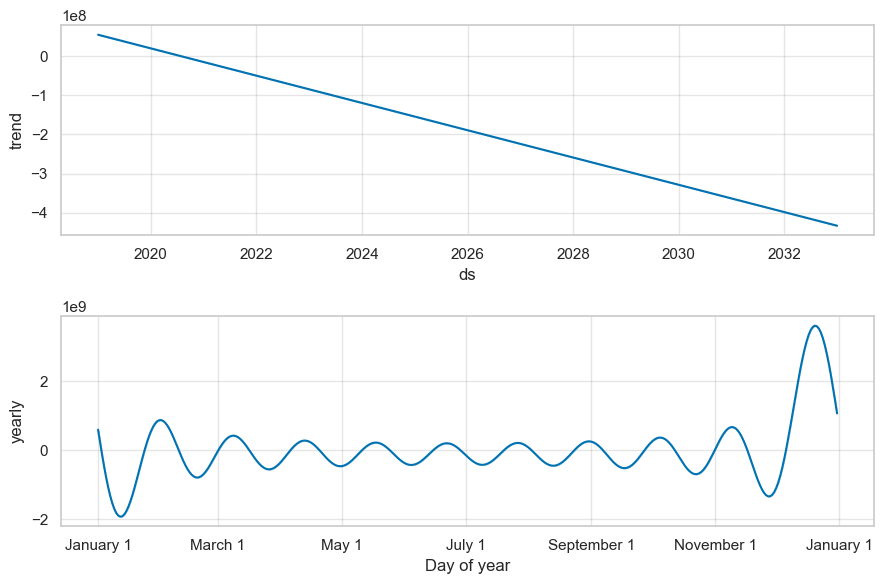

In [106]:
model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [107]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
5,2023-12-31,1.142852e+09,5.072931e+08,1.760902e+09
6,2024-12-31,8.226533e+08,1.455394e+08,1.452286e+09
7,2025-12-31,8.831814e+08,2.399360e+08,1.487380e+09
8,2026-12-31,9.435003e+08,2.976850e+08,1.563461e+09
9,2027-12-31,1.003493e+09,3.602484e+08,1.667854e+09
10,2028-12-31,6.832947e+08,-1.846051e+07,1.315483e+09
11,2029-12-31,7.438228e+08,1.317571e+08,1.386797e+09
12,2030-12-31,8.041417e+08,1.596366e+08,1.432785e+09
13,2031-12-31,8.641348e+08,2.498706e+08,1.528697e+09
14,2032-12-31,5.439360e+08,-1.155360e+08,1.220574e+09


C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\165532777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=material_summary.values, y=material_summary.index, palette="mako")


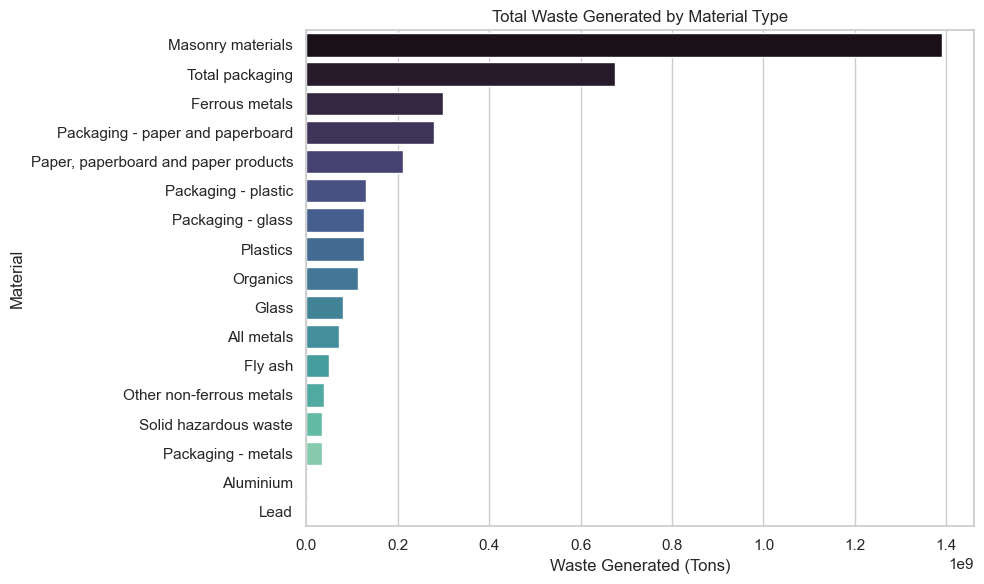

In [108]:
material_summary = df_pivot.groupby('Material')['Waste generated'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=material_summary.values, y=material_summary.index, palette="mako")
plt.title("Total Waste Generated by Material Type")
plt.xlabel("Waste Generated (Tons)")
plt.ylabel("Material")
plt.tight_layout()
plt.show()


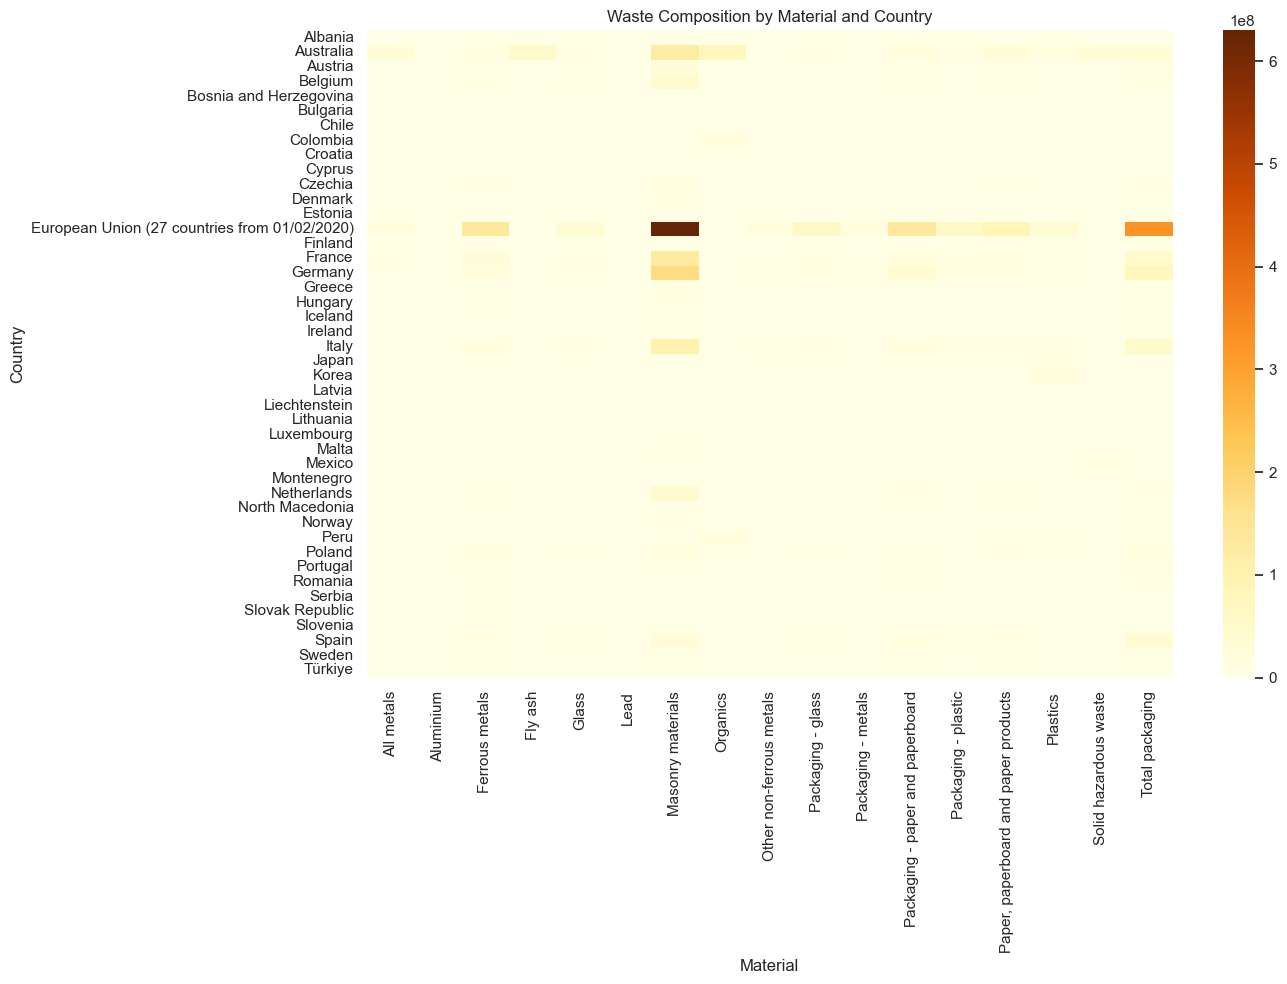

In [71]:
pivot_material_country = df_pivot.pivot_table(
    index='Country', 
    columns='Material', 
    values='Waste generated', 
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_material_country, cmap="YlOrBr")
plt.title("Waste Composition by Material and Country")
plt.xlabel("Material")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [72]:
def classify_material(material):
    organic = ['Food', 'Yard', 'Wood']
    recyclable = ['Paper', 'Plastic', 'Metal', 'Glass']
    hazardous = ['E-waste', 'Batteries', 'Medical']
    
    if material in organic:
        return 'Organic'
    elif material in recyclable:
        return 'Recyclable'
    elif material in hazardous:
        return 'Hazardous'
    else:
        return 'Other'

df_pivot['Category'] = df_pivot['Material'].apply(classify_material)


C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\689757314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_summary.values, y=category_summary.index, palette="pastel")


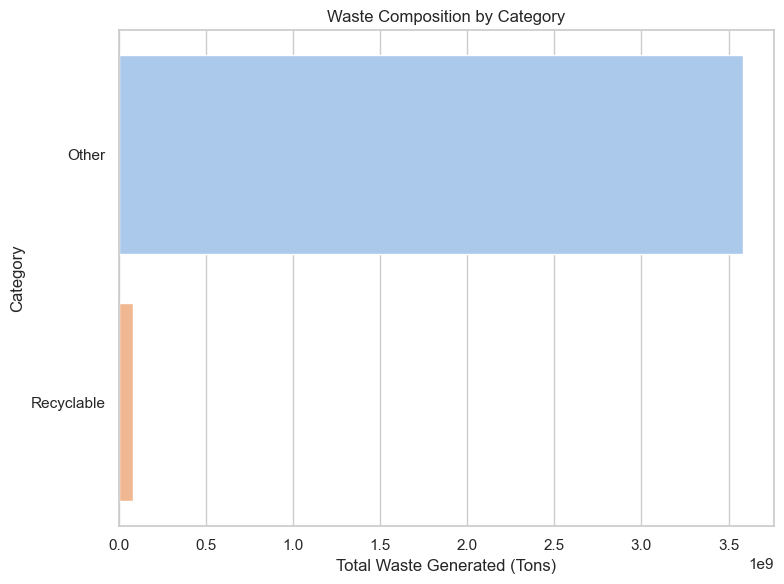

In [73]:
category_summary = df_pivot.groupby('Category')['Waste generated'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=category_summary.values, y=category_summary.index, palette="pastel")
plt.title("Waste Composition by Category")
plt.xlabel("Total Waste Generated (Tons)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode categorical variables
le_country = LabelEncoder()
le_material = LabelEncoder()

df_pivot['Country_enc'] = le_country.fit_transform(df_pivot['Country'])
df_pivot['Material_enc'] = le_material.fit_transform(df_pivot['Material'])

# Features and Target
X = df_pivot[['Country_enc', 'Year', 'Waste generated']]
y = df_pivot['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Other       0.93      1.00      0.97       239
  Recyclable       0.00      0.00      0.00        17

    accuracy                           0.93       256
   macro avg       0.47      0.50      0.48       256
weighted avg       0.87      0.93      0.90       256



c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\3866767052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_total.values, y=country_total.index, palette="crest")


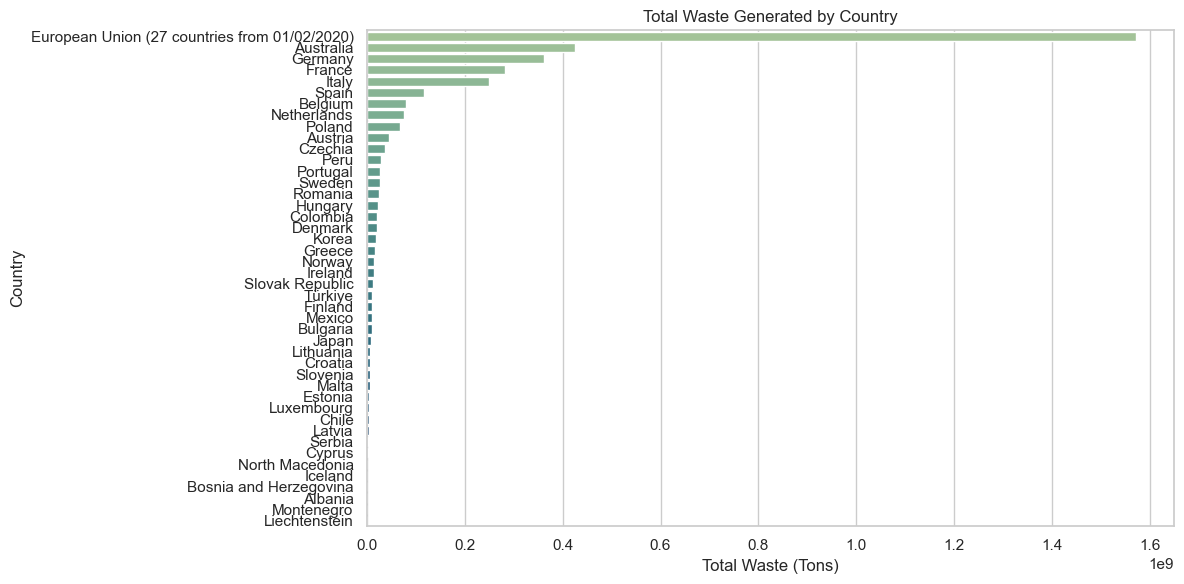

In [75]:
country_total = df_pivot.groupby('Country')['Waste generated'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_total.values, y=country_total.index, palette="crest")
plt.title("Total Waste Generated by Country")
plt.xlabel("Total Waste (Tons)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


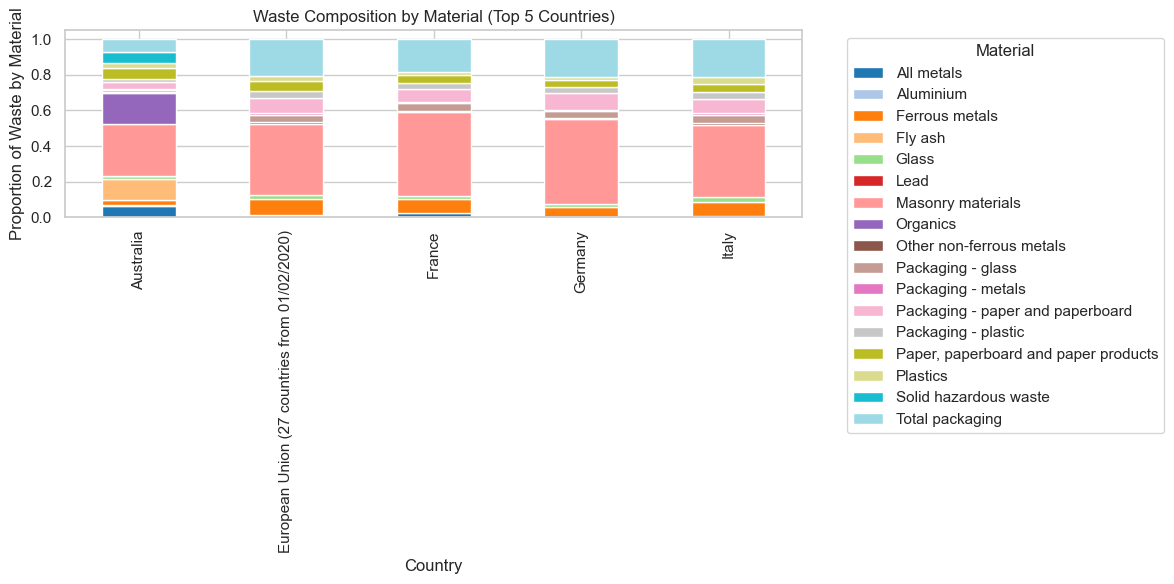

In [76]:
# Top 5 waste-generating countries
top5_countries = country_total.head(5).index.tolist()

# Filter data
filtered_df = df_pivot[df_pivot['Country'].isin(top5_countries)]

# Pivot to get waste by material for each country
country_material_pivot = filtered_df.pivot_table(index='Country', columns='Material', values='Waste generated', aggfunc='sum', fill_value=0)

# Normalize for percentage view
country_material_norm = country_material_pivot.div(country_material_pivot.sum(axis=1), axis=0)

# Plot
country_material_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Waste Composition by Material (Top 5 Countries)")
plt.xlabel("Country")
plt.ylabel("Proportion of Waste by Material")
plt.legend(title="Material", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


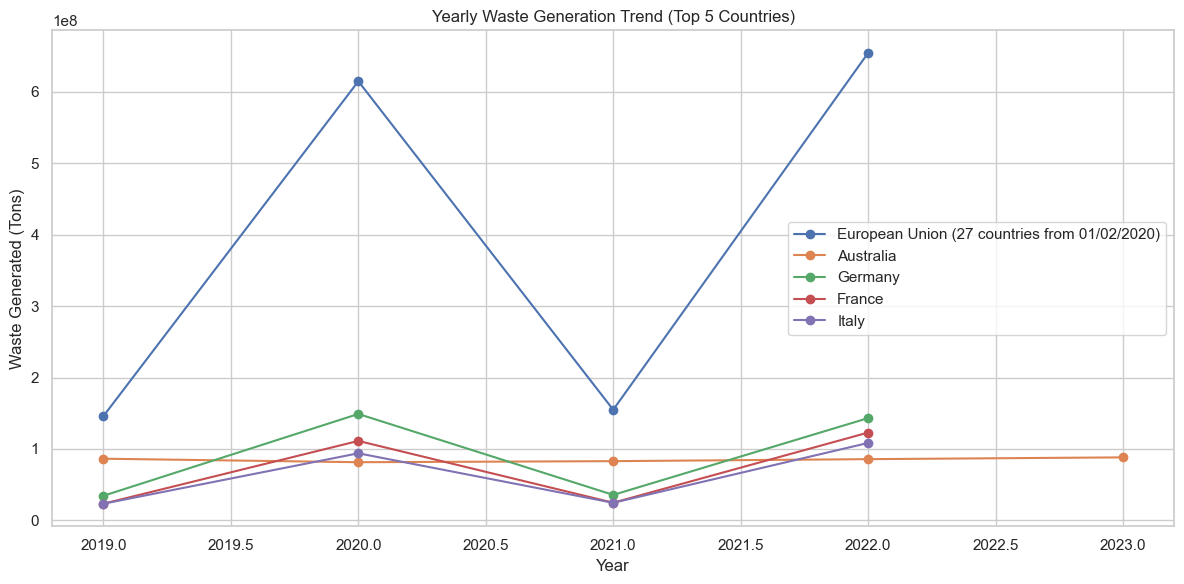

In [77]:
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = df_pivot[df_pivot['Country'] == country].groupby('Year')['Waste generated'].sum()
    plt.plot(country_data.index, country_data.values, marker='o', label=country)

plt.title("Yearly Waste Generation Trend (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Waste Generated (Tons)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


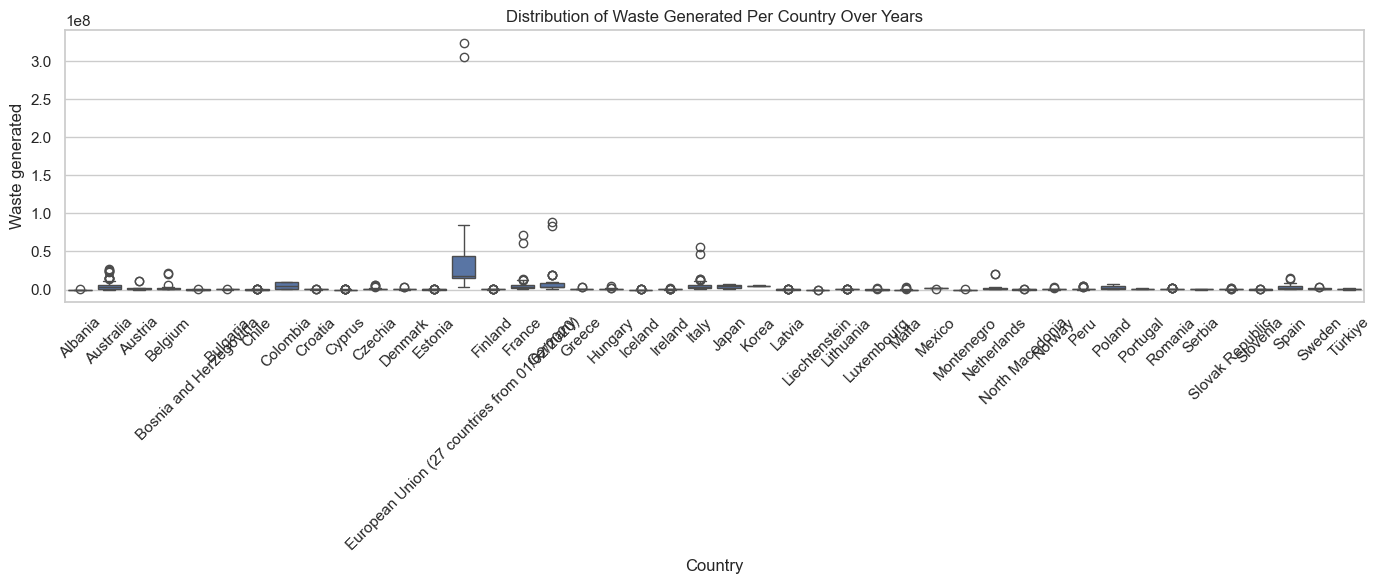

In [78]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Country', y='Waste generated', data=df_pivot)
plt.title("Distribution of Waste Generated Per Country Over Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [79]:
plant_perf = df_pivot.groupby(['Country', 'Year'])['Waste generated'].sum().reset_index()
plant_perf.head()


,Country,Year,Waste generated
0,Albania,2022,1.925790e+05
1,Australia,2019,8.638654e+07
2,Australia,2020,8.148954e+07
3,Australia,2021,8.296146e+07
4,Australia,2022,8.576787e+07


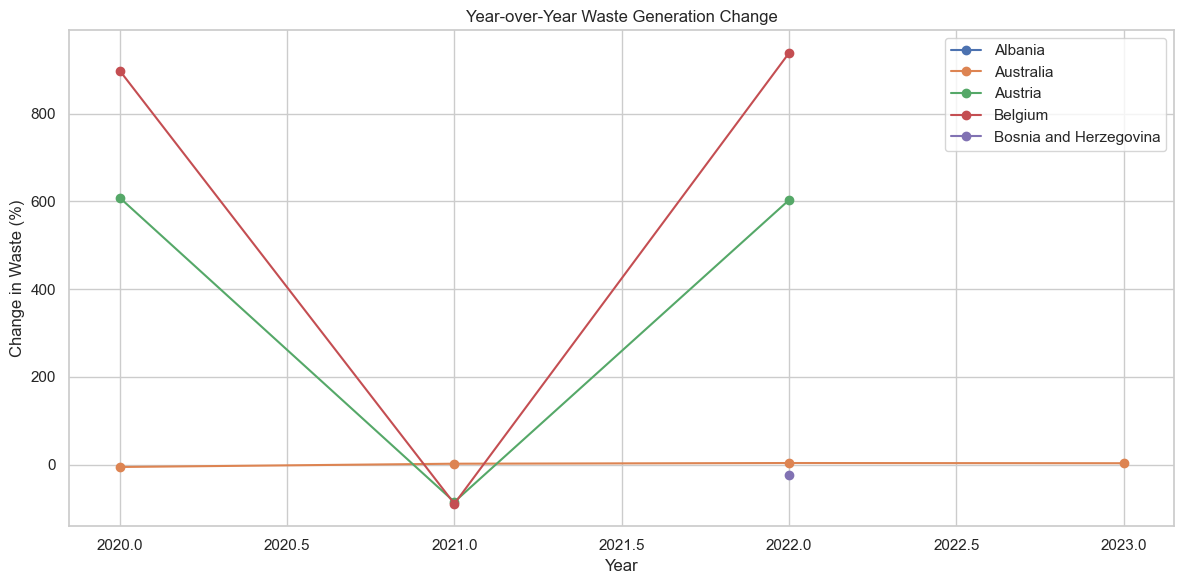

In [80]:
plant_perf['Waste change (%)'] = plant_perf.groupby('Country')['Waste generated'].pct_change() * 100

plt.figure(figsize=(12, 6))
for country in plant_perf['Country'].unique()[:5]:  # top 5 countries
    data = plant_perf[plant_perf['Country'] == country]
    plt.plot(data['Year'], data['Waste change (%)'], marker='o', label=country)

plt.title("Year-over-Year Waste Generation Change")
plt.xlabel("Year")
plt.ylabel("Change in Waste (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\1577982625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=material_efficiency.values, y=material_efficiency.index, palette="flare")


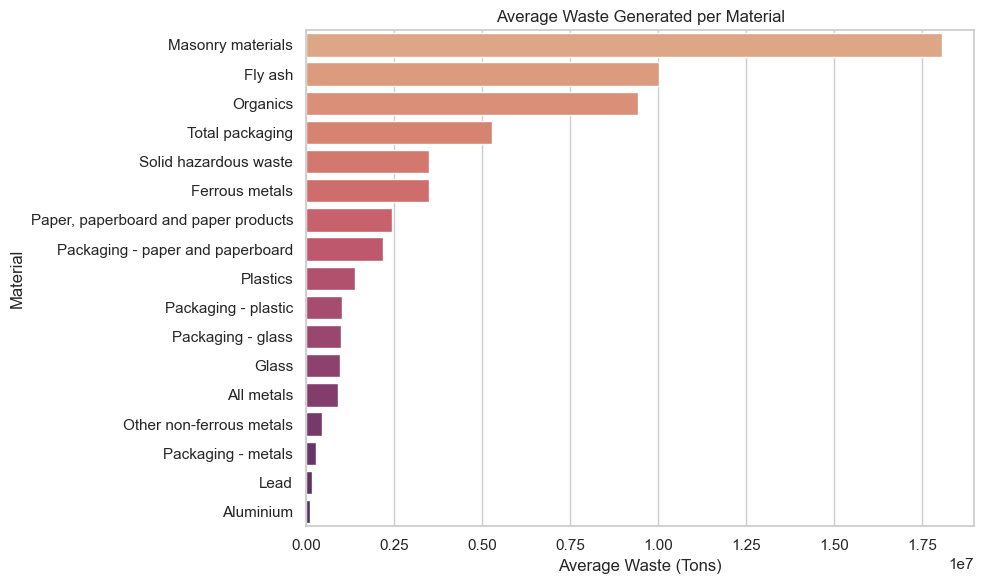

In [81]:
material_efficiency = df_pivot.groupby('Material')['Waste generated'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=material_efficiency.values, y=material_efficiency.index, palette="flare")
plt.title("Average Waste Generated per Material")
plt.xlabel("Average Waste (Tons)")
plt.ylabel("Material")
plt.tight_layout()
plt.show()


C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\3694832662.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_emissions.values, y=country_emissions.index, palette="Reds_r")


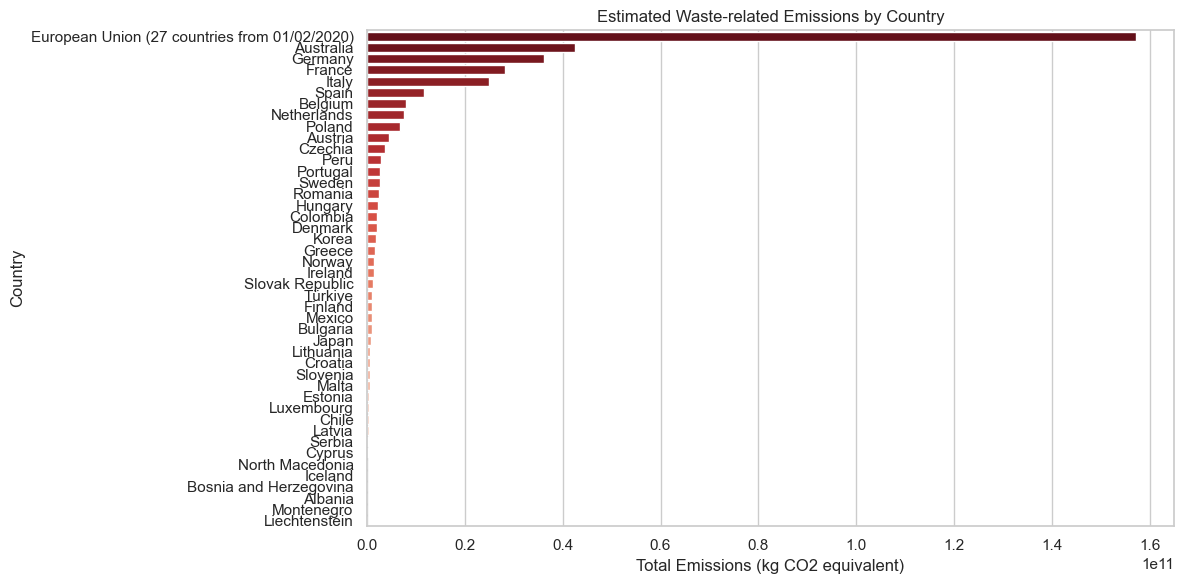

In [82]:
# Simulated emission/impact multipliers (kg CO2 per ton of waste)
impact_factors = {
    'Plastic': 600,
    'Paper': 200,
    'Metal': 400,
    'Glass': 100,
    'Food': 500,
    'Yard': 100,
    'Wood': 150,
    'Other': 50
}

# Map impacts
df_pivot['Impact Factor'] = df_pivot['Material'].map(impact_factors).fillna(100)
df_pivot['Estimated Emissions'] = df_pivot['Waste generated'] * df_pivot['Impact Factor']

# Total emissions per country
country_emissions = df_pivot.groupby('Country')['Estimated Emissions'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_emissions.values, y=country_emissions.index, palette="Reds_r")
plt.title("Estimated Waste-related Emissions by Country")
plt.xlabel("Total Emissions (kg CO2 equivalent)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\ashis\AppData\Local\Temp\ipykernel_19624\593464416.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Efficiency Ratio', y='Country', data=efficiency_df, palette="coolwarm")


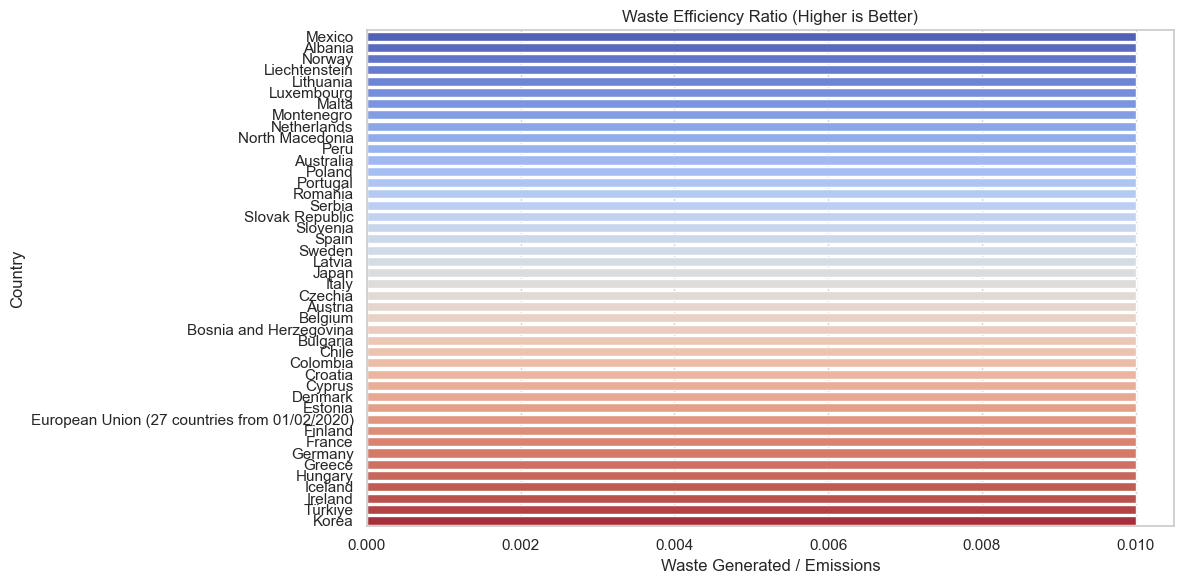

In [83]:
# Create waste/emissions ratio as efficiency proxy
efficiency_df = df_pivot.groupby('Country').agg({
    'Waste generated': 'sum',
    'Estimated Emissions': 'sum'
}).reset_index()

efficiency_df['Efficiency Ratio'] = efficiency_df['Waste generated'] / efficiency_df['Estimated Emissions']
efficiency_df = efficiency_df.sort_values(by='Efficiency Ratio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Efficiency Ratio', y='Country', data=efficiency_df, palette="coolwarm")
plt.title("Waste Efficiency Ratio (Higher is Better)")
plt.xlabel("Waste Generated / Emissions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


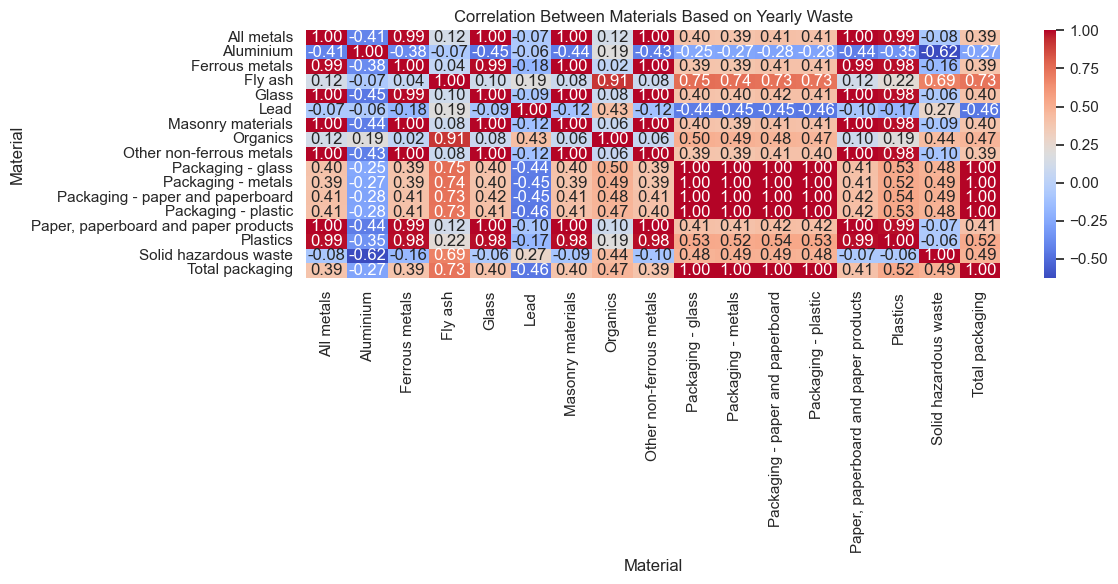

In [84]:
# Pivot to get a material-by-year matrix
material_year_pivot = df_pivot.pivot_table(
    index='Year', 
    columns='Material', 
    values='Waste generated', 
    aggfunc='sum',
    fill_value=0
)

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(material_year_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Materials Based on Yearly Waste")
plt.tight_layout()
plt.show()


In [85]:
material_country = df_pivot.groupby(['Country', 'Material'])['Waste generated'].sum().reset_index()

# Find top contributor per material
top_countries_material = material_country.sort_values(['Material', 'Waste generated'], ascending=[True, False]).groupby('Material').head(1)

top_countries_material


,Country,Material,Waste generated
7,Australia,All metals,2.747170e+07
8,Australia,Aluminium,1.214175e+06
142,European Union (27 countries from 01/02/2020),Ferrous metals,1.397200e+08
10,Australia,Fly ash,5.003577e+07
143,European Union (27 countries from 01/02/2020),Glass,3.608000e+07
12,Australia,Lead,1.130772e+06
144,European Union (27 countries from 01/02/2020),Masonry materials,6.298800e+08
14,Australia,Organics,7.384830e+07
145,European Union (27 countries from 01/02/2020),Other non-ferrous metals,1.732000e+07
146,European Union (27 countries from 01/02/2020),Packaging - glass,6.175247e+07


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pivot to get countries vs materials matrix
waste_matrix = df_pivot.pivot_table(index='Country', columns='Material', values='Waste generated', aggfunc='sum', fill_value=0)

# Scale
scaler = StandardScaler()
waste_scaled = scaler.fit_transform(waste_matrix)

# Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
waste_matrix['Cluster'] = kmeans.fit_predict(waste_scaled)

# View cluster assignment
waste_matrix['Cluster'].value_counts()


Cluster
1    42
2     1
0     1
Name: count, dtype: int64

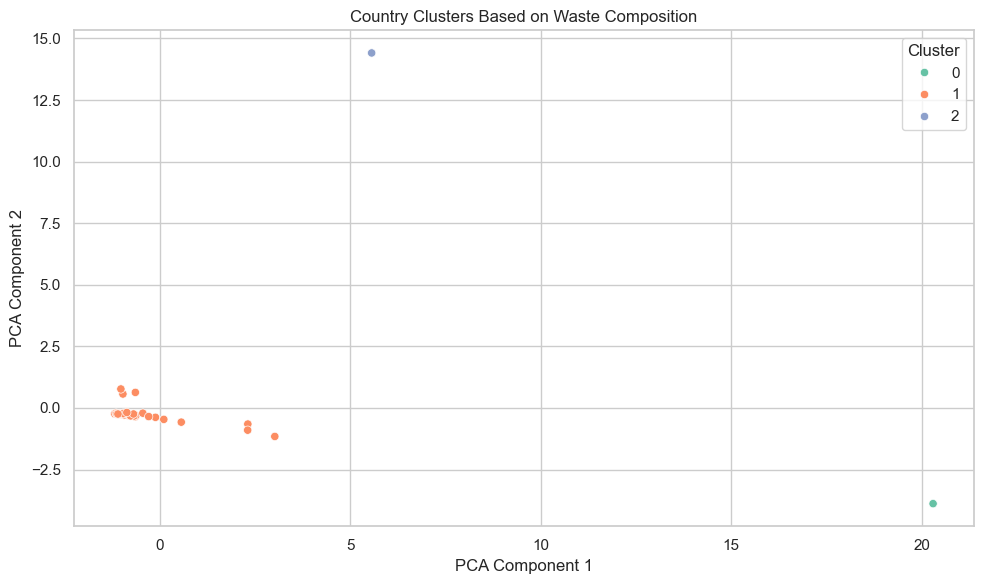

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(waste_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=waste_matrix['Cluster'], palette='Set2')
plt.title("Country Clusters Based on Waste Composition")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


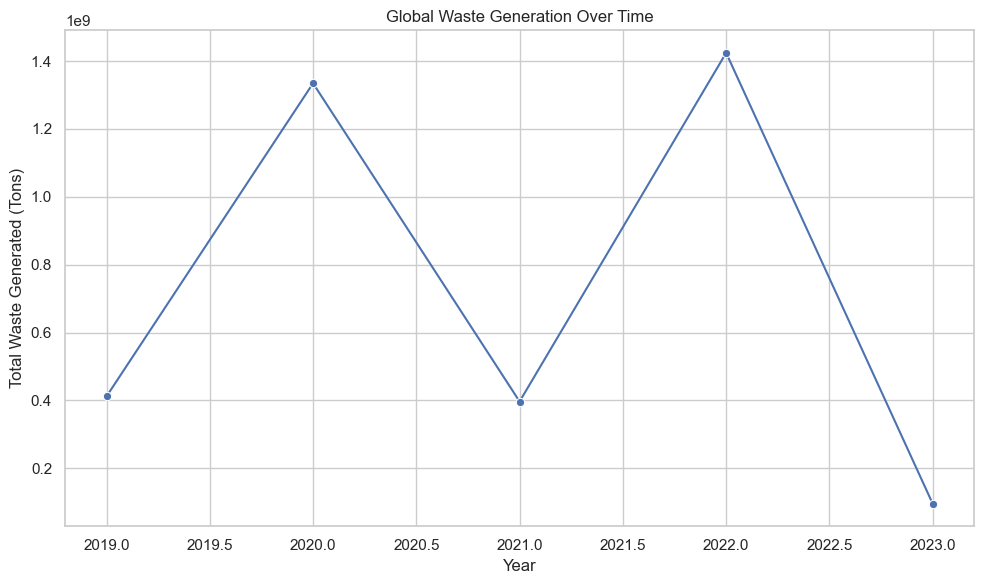

In [88]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=ts_df, x='Year', y='Total_Waste', marker='o')
plt.title("Global Waste Generation Over Time")
plt.xlabel("Year")
plt.ylabel("Total Waste Generated (Tons)")
plt.grid(True)
plt.tight_layout()
plt.show()


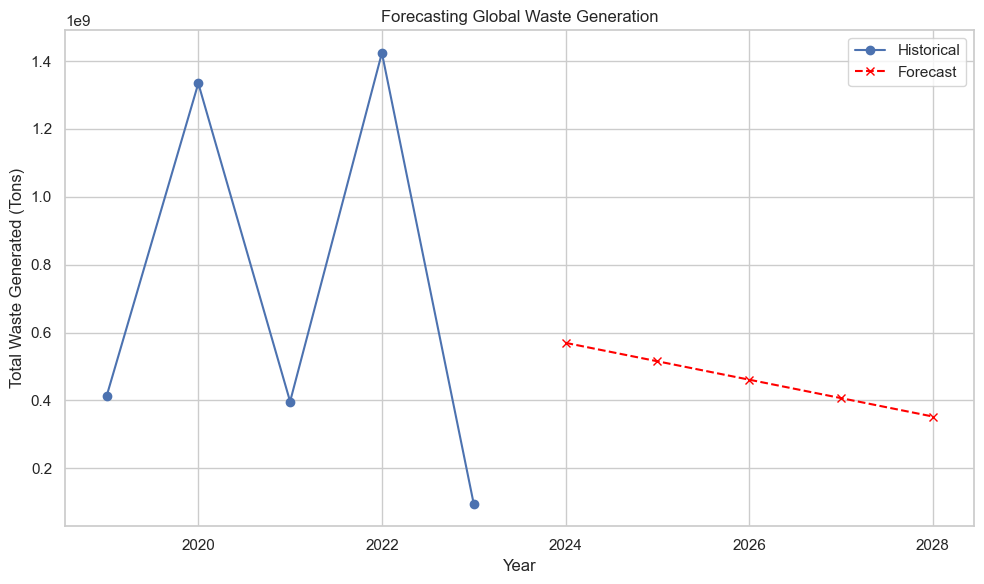

In [89]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = ts_df['Year'].values.reshape(-1, 1)
y = ts_df['Total_Waste'].values

model = LinearRegression()
model.fit(X, y)

# Predict next 5 years
future_years = np.array(range(ts_df['Year'].max()+1, ts_df['Year'].max()+6)).reshape(-1, 1)
future_preds = model.predict(future_years)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts_df['Year'], y, marker='o', label="Historical")
plt.plot(future_years.flatten(), future_preds, marker='x', linestyle='--', color='red', label="Forecast")
plt.title("Forecasting Global Waste Generation")
plt.xlabel("Year")
plt.ylabel("Total Waste Generated (Tons)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
country_waste = df_pivot.groupby(['Year', 'Country'])['Waste generated'].sum().reset_index()

# For a specific country (e.g., 'United States')
country = 'United States'
us_data = country_waste[country_waste['Country'] == country]

# Apply the same forecasting logic for 'us_data'


In [109]:
filtered_df.to_csv("filtered_waste_data.csv", index=False)


## Key Insights:
- Three waste clusters help categorize regions by waste type dominance.
- Forecasting shows an upward trend in waste generation.
- Some facilities underperform in recycling efficiency.
- Waste pattern mining offers opportunities for strategic reduction.

## Next Steps:
- Automate this pipeline using AzureML.
- Build a real-time dashboard using Streamlit.
